In [124]:
import numpy as np
import pandas as pd
import pickle
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
input_processed_path = 'Preprocessed data/inputs/'
target_processed_path = 'Preprocessed data/targets/'

## Importing variables

In [160]:
with open('Preprocessed data/preprocess_vars.pkl', 'rb') as file:
    preprocess_vars = pickle.load(file)

input_cols = preprocess_vars['input_cols']
numeric_cols = preprocess_vars['numeric_cols']
categorical_cols = preprocess_vars['categorical_cols']
encoded_cols = preprocess_vars['encoded_cols']
target_col = preprocess_vars['target_col']

## Importing the inputs and targets

In [161]:
train_inputs = pd.read_parquet(input_processed_path + 'train_inputs.parquet')
val_inputs = pd.read_parquet(input_processed_path + 'val_inputs.parquet')
test_inputs = pd.read_parquet(input_processed_path + 'test_inputs.parquet')

train_targets = pd.read_parquet(target_processed_path + 'train_targets.parquet')[target_col]
val_targets = pd.read_parquet(target_processed_path + 'val_targets.parquet')[target_col]
test_targets = pd.read_parquet(target_processed_path + 'test_targets.parquet')[target_col]

In [162]:
print(f'Train inputs shape: {train_inputs.shape}')
print(f'Validation inputs shape: {val_inputs.shape}')
print(f'Test inputs shape: {test_inputs.shape}')

print(f'Train targets shape: {train_targets.shape}')
print(f'Validation targets shape: {val_targets.shape}')
print(f'Test targets shape: {test_targets.shape}')

Train inputs shape: (9720, 123)
Validation inputs shape: (1760, 123)
Test inputs shape: (2599, 123)
Train targets shape: (9720,)
Validation targets shape: (1760,)
Test targets shape: (2599,)


In [163]:
test_targets

105090     No
73290      No
99380      No
8550       No
123787     No
         ... 
143557     No
33460      No
135720    Yes
51875      No
143744    Yes
Name: RainTomorrow, Length: 2599, dtype: object

In [164]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
79516,Watsonia,0.489305,0.333333,0.000000,0.013514,0.014184,NNW,0.259259,NNW,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119326,PerthAirport,0.724599,0.676707,0.000000,0.158784,0.758865,ENE,0.379630,NE,W,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1410,Albury,0.366310,0.493976,0.000000,0.090282,0.537753,SSE,0.212963,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4482,BadgerysCreek,0.647059,0.588353,0.000000,0.090282,0.537753,E,0.175926,SW,NE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52202,MountGinini,0.213904,0.214859,0.000000,0.090282,0.537753,None,0.305659,None,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46378,Canberra,0.545455,0.618474,0.000000,0.155405,0.537753,None,0.305659,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
124128,SalmonGums,0.502674,0.616466,0.000000,0.090282,0.537753,NE,0.361111,E,NE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13939,Moree,0.459893,0.540161,0.000000,0.090282,0.537753,ESE,0.379630,ENE,S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15611,Newcastle,0.451872,0.445783,0.024167,0.090282,0.537753,None,0.305659,None,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
#?LogisticRegression

In [167]:
model = LogisticRegression(solver = 'liblinear', max_iter=10000)

In [168]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: total: 172 ms
Wall time: 166 ms


LogisticRegression(max_iter=10000, solver='liblinear')

In logistic regression, targets can be categorical as logistic regression converts the first class to 0, the next different class to 1.

In [169]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [170]:
print(model.coef_.tolist())

[[0.5182818807387183, -1.3493844961329815, 1.2364987938283507, 0.7563520789404125, -1.4341235797662197, 4.445954396673129, -0.35080552764507567, -0.6728685568210762, 0.5663847738185374, 5.298000372792403, 0.8183777328240179, -4.62448185179138, 0.060468432011130495, 0.830680199536075, 0.39844715511777185, 0.4129680160241685, 0.6503857838080874, -0.6228553932297409, 0.1611142021978888, -0.22243389186806317, 0.5526726431659524, -0.3231759795293888, -0.07709889740762117, 0.3499752645606579, 0.18889393536154325, -0.46516426696495733, 0.17437341619077423, 0.1498052356638266, 0.10467289438119534, -0.23570653866460292, -0.010467550938577378, -0.5240221988214921, -0.9525447634777849, -0.13717396886423106, -0.7124107570721578, -0.19334555960511374, 0.3605107589237707, 0.2699109409110941, 0.18249586158718734, -0.6365028768342986, -0.16059861315717897, -0.15064848165357309, -0.20266143927388236, -0.4258986357562561, 0.1045265900253939, -0.021497445791029666, 0.46622324564988055, 0.4672131172265606

In [171]:
print(model.intercept_)

[-1.95613994]


In [172]:
weight_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'weight': model.coef_.tolist()[0]
})
print(weight_df.to_string())

                       feature    weight
0                      MinTemp  0.518282
1                      MaxTemp -1.349384
2                     Rainfall  1.236499
3                  Evaporation  0.756352
4                     Sunshine -1.434124
5                WindGustSpeed  4.445954
6                 WindSpeed9am -0.350806
7                 WindSpeed3pm -0.672869
8                  Humidity9am  0.566385
9                  Humidity3pm  5.298000
10                 Pressure9am  0.818378
11                 Pressure3pm -4.624482
12                    Cloud9am  0.060468
13                    Cloud3pm  0.830680
14                     Temp9am  0.398447
15                     Temp3pm  0.412968
16           Location_Adelaide  0.650386
17             Location_Albany -0.622855
18             Location_Albury  0.161114
19       Location_AliceSprings -0.222434
20      Location_BadgerysCreek  0.552673
21           Location_Ballarat -0.323176
22            Location_Bendigo -0.077099
23           Loc

<Axes: xlabel='weight', ylabel='feature'>

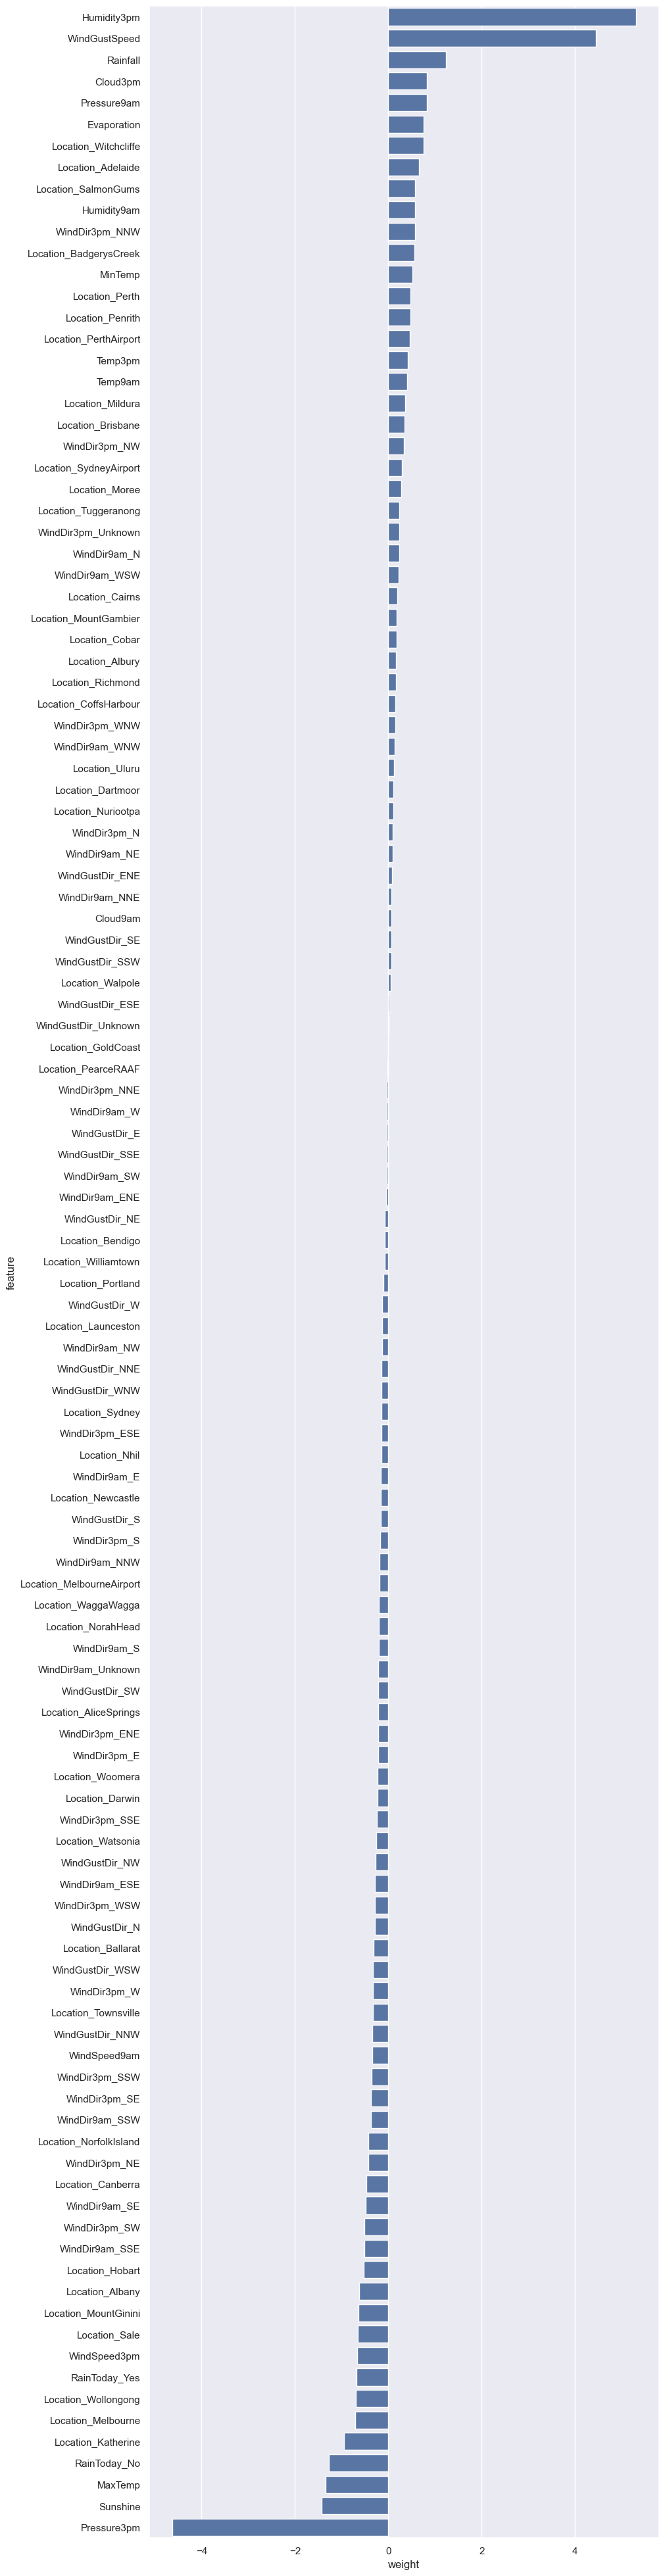

In [173]:
plt.figure(figsize = (10, 50))
sns.barplot(data = weight_df.sort_values('weight', ascending = False), y= 'feature', x = 'weight')

In [174]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [175]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [176]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.668843  , 0.331157  ],
       [0.72646103, 0.27353897],
       [0.99071525, 0.00928475],
       ...,
       [0.97443993, 0.02556007],
       [0.62840612, 0.37159388],
       [0.76001269, 0.23998731]])

In [177]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [178]:
train_targets

79516     No
119326    No
1410      No
4482      No
52202     No
          ..
46378     No
124128    No
13939     No
15611     No
67321     No
Name: RainTomorrow, Length: 9720, dtype: object

In [179]:
from sklearn.metrics import accuracy_score

In [180]:
accuracy_score(train_targets, train_preds)

0.8513374485596708

In [181]:
from sklearn.metrics import confusion_matrix

In [182]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.9481383 , 0.0518617 ],
       [0.47954545, 0.52045455]])

In [183]:
confusion_matrix(train_targets, train_preds, normalize = 'true') * 100

array([[94.81382979,  5.18617021],
       [47.95454545, 52.04545455]])

In [184]:
def predict_and_plot(inputs, targets, name = ""):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print('Accuracy score: {:.2f}%'.format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy score: 85.13%


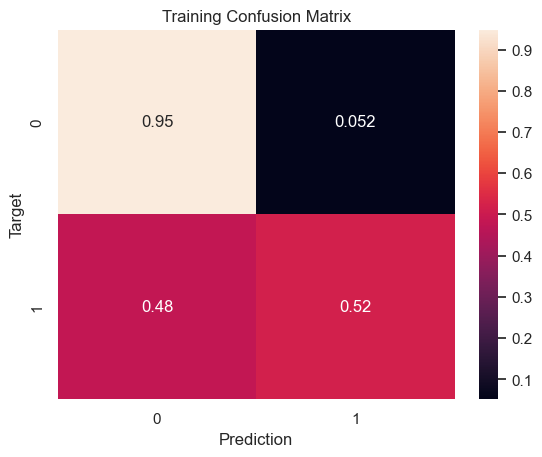

In [185]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy score: 85.68%


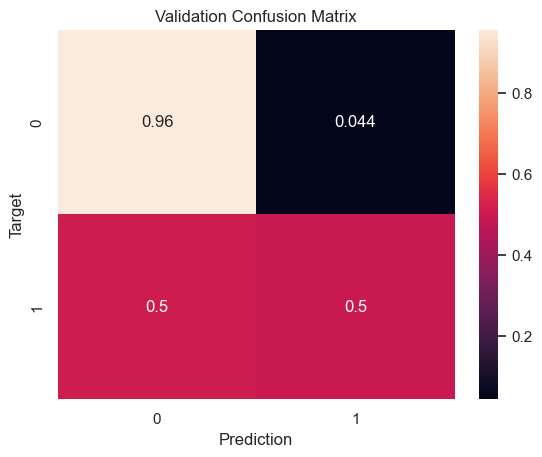

In [186]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy score: 85.68%


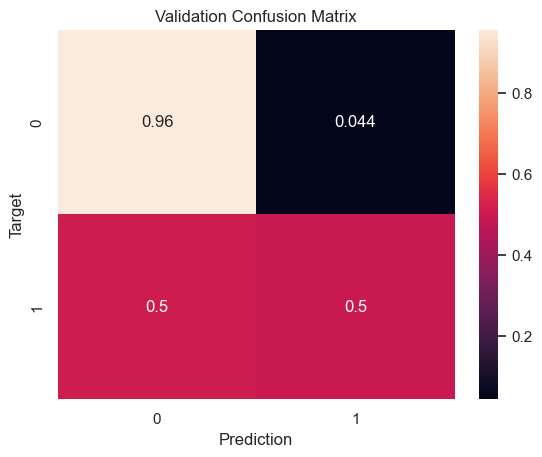

In [187]:
test_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [188]:
aussie_rain = joblib.load('Preprocessed data/aussie_rain.joblib')

In [189]:
aussie_rain

{'imputer': SimpleImputer(),
 'scaler': MinMaxScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)}

In [191]:
aussie_rain['model'] = model
aussie_rain['input_cols'] = input_cols
aussie_rain['target_col'] = target_col
aussie_rain['categorical_cols'] = categorical_cols
aussie_rain['numeric_cols'] = numeric_cols
aussie_rain['encoded_cols'] = encoded_cols

In [194]:
joblib.dump(aussie_rain,'Preprocessed data/aussie_rain.joblib')

['Preprocessed data/aussie_rain.joblib']

In [199]:
aussie_rain.keys()

dict_keys(['imputer', 'scaler', 'encoder', 'model', 'input_cols', 'target_col', 'categorical_cols', 'numeric_cols', 'encoded_cols'])

In [200]:
aussie_rain2 = joblib.load('Preprocessed data/aussie_rain.joblib')

In [202]:
aussie_rain2['model'].coef_

array([[ 0.51828188, -1.3493845 ,  1.23649879,  0.75635208, -1.43412358,
         4.4459544 , -0.35080553, -0.67286856,  0.56638477,  5.29800037,
         0.81837773, -4.62448185,  0.06046843,  0.8306802 ,  0.39844716,
         0.41296802,  0.65038578, -0.62285539,  0.1611142 , -0.22243389,
         0.55267264, -0.32317598, -0.0770989 ,  0.34997526,  0.18889394,
        -0.46516427,  0.17437342,  0.14980524,  0.10467289, -0.23570654,
        -0.01046755, -0.5240222 , -0.95254476, -0.13717397, -0.71241076,
        -0.19334556,  0.36051076,  0.26991094,  0.18249586, -0.63650288,
        -0.16059861, -0.15064848, -0.20266144, -0.42589864,  0.10452659,
        -0.02149745,  0.46622325,  0.46721312,  0.46474903, -0.10829035,
         0.16104189, -0.65201585,  0.56869431, -0.1495004 ,  0.28907949,
        -0.32908366,  0.23960176,  0.12163932, -0.19676498,  0.04300551,
        -0.25395187, -0.0797884 ,  0.75118296, -0.70235387, -0.23195145,
        -0.03651824,  0.07731335,  0.02789876, -0.2

In [203]:
aussie_rain2['model'].intercept_

array([-1.95613994])